In [71]:
import networkit as nk
import pandas as pd
import sys
sys.path.append('../python_implementation')
from algorithms_implementation import community_centrality_std
import os

In [60]:
import matplotlib.colors as mcolors

def interpolate_color(colors, value):
    rgba = [mcolors.to_rgba(color) for color in colors]
    delta = 1/(len(colors)-1)
    i_color= int(value/delta)
    i_value = (value%delta)/delta
    
    if i_color+ 1 >= len(colors):
        return rgba[-1]
    else:
        print(i_value)
        rgba1 = rgba[i_color]
        rgba2 = rgba[i_color+1]
        interpolated_rgba = tuple((c1 * (1 - i_value) + c2 * i_value) for c1, c2 in zip(rgba1, rgba2))
        return interpolated_rgba

In [61]:
num_nodes = 9
G = nk.graph.Graph(num_nodes)

# Aggiunta degli archi per formare un percorso lineare
for i in range(num_nodes - 1):
    G.addEdge(i, i + 1)

In [62]:
ranking_nodes = community_centrality_std(G)
print(type(ranking_nodes[0]))
ranking_nodes[0]

<class 'list'>


[(8, 0.08),
 (0, 0.08695652173913043),
 (7, 0.10526315789473684),
 (1, 0.11764705882352941),
 (6, 0.13333333333333333),
 (2, 0.15384615384615385),
 (5, 0.15384615384615385),
 (3, 0.18181818181818182),
 (4, 0.18181818181818182)]

In [63]:
min_node = min(ranking_nodes[0], key=lambda x: x[1])
max_node = max(ranking_nodes[0], key=lambda x: x[1])
min_node, max_node

((8, 0.08), (3, 0.18181818181818182))

In [64]:
normalized_ranking_nodes = {}
for node in ranking_nodes[0]:
    normalized_val = (node[1]- min_node[1])/(max_node[1] - min_node[1])
    normalized_ranking_nodes[node[0]] = normalized_val
normalized_ranking_nodes

{8: 0.0,
 0: 0.06832298136645959,
 7: 0.24812030075187963,
 1: 0.36974789915966383,
 6: 0.5238095238095237,
 2: 0.7252747252747254,
 5: 0.7252747252747254,
 3: 1.0,
 4: 1.0}

0.06832298136645959
0.36974789915966383
0.7252747252747254
0.7252747252747254
0.5238095238095237
0.24812030075187963
0.0


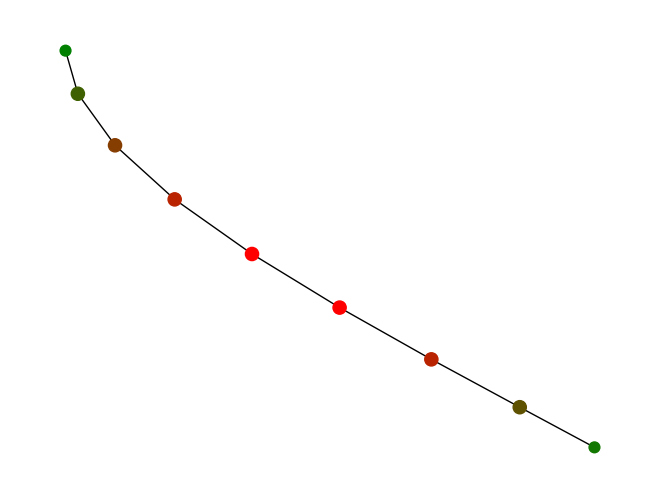

In [65]:
colors = ['green', 'red']

node_color = [interpolate_color(colors, normalized_ranking_nodes[node]) for node in range(G.numberOfNodes())]
nk.viztasks.drawGraph(G, node_color=node_color)

In [66]:
num_nodes = 8
G = nk.graph.Graph(2*num_nodes)

# Aggiunta degli archi per formare un percorso lineare
for i in range(num_nodes - 1):
    G.addEdge(i, i + 1)
G.addEdge(num_nodes - 1, 0)
# Aggiunta degli archi per formare un percorso lineare
for i in range(num_nodes):
    G.addEdge(i, i+ num_nodes)

In [67]:
ranking_nodes = community_centrality_std(G)
print(type(ranking_nodes[0]))
ranking_nodes[0]

<class 'list'>


[(12, 0.0625),
 (14, 0.0625),
 (9, 0.06666666666666667),
 (11, 0.06666666666666667),
 (13, 0.06666666666666667),
 (15, 0.06666666666666667),
 (8, 0.07142857142857142),
 (10, 0.07142857142857142),
 (4, 0.09090909090909091),
 (6, 0.09090909090909091),
 (1, 0.1),
 (3, 0.1),
 (5, 0.1),
 (7, 0.1),
 (0, 0.1111111111111111),
 (2, 0.1111111111111111)]

In [68]:
min_node = min(ranking_nodes[0], key=lambda x: x[1])
max_node = max(ranking_nodes[0], key=lambda x: x[1])
min_node, max_node

((12, 0.0625), (0, 0.1111111111111111))

In [69]:
normalized_ranking_nodes = {}
for node in ranking_nodes[0]:
    normalized_val = (node[1]- min_node[1])/(max_node[1] - min_node[1])
    normalized_ranking_nodes[node[0]] = normalized_val
normalized_ranking_nodes

{12: 0.0,
 14: 0.0,
 9: 0.0857142857142857,
 11: 0.0857142857142857,
 13: 0.0857142857142857,
 15: 0.0857142857142857,
 8: 0.18367346938775506,
 10: 0.18367346938775506,
 4: 0.5844155844155845,
 6: 0.5844155844155845,
 1: 0.7714285714285717,
 3: 0.7714285714285717,
 5: 0.7714285714285717,
 7: 0.7714285714285717,
 0: 1.0,
 2: 1.0}

0.7714285714285717
0.7714285714285717
0.5844155844155845
0.7714285714285717
0.5844155844155845
0.7714285714285717
0.18367346938775506
0.0857142857142857
0.18367346938775506
0.0857142857142857
0.0
0.0857142857142857
0.0
0.0857142857142857


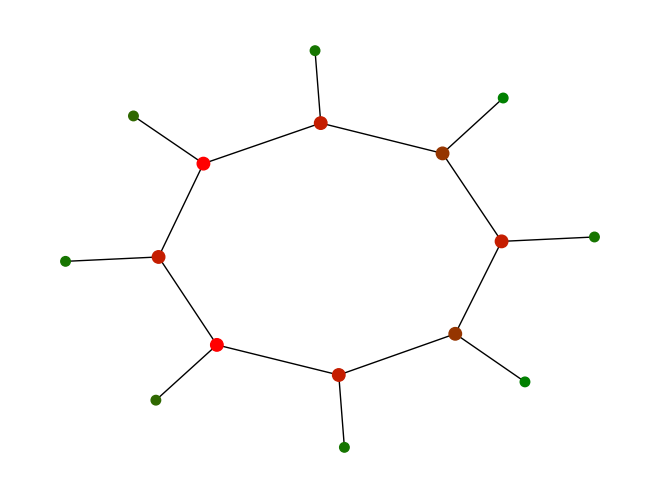

In [70]:
colors = ['green', 'red']

node_color = [interpolate_color(colors, normalized_ranking_nodes[node]) for node in range(G.numberOfNodes())]
nk.viztasks.drawGraph(G, node_color=node_color)

In [72]:
def filter_file(keyword, root):
    result = []
    for i, gp in enumerate(os.listdir(root)):
        if keyword in gp or keyword == "":
            result.append(f"{root}{gp}")
    return result

In [74]:
cpp_results = filter_file("C++Std", "../results/2expnode(fixnumbercommunity)/")
py_results = filter_file("pythonStd", "../results/2expnode(fixnumbercommunity)/")
cpp_results_undirected = filter_file("C++Std", "../results/2expnodeundirected(fixnumbercommunity)/")
py_results_undirected = filter_file("pythonStd", "../results/2expnodeundirected(fixnumbercommunity)/")
cpp_results, py_results, cpp_results_undirected, py_results_undirected

(['../results/2expnode(fixnumbercommunity)/C++Std(2expnode(n=10240, m=50000).graph).csv',
  '../results/2expnode(fixnumbercommunity)/C++Std(2expnode(n=1280, m=50000).graph).csv',
  '../results/2expnode(fixnumbercommunity)/C++Std(2expnode(n=20480, m=50000).graph).csv',
  '../results/2expnode(fixnumbercommunity)/C++Std(2expnode(n=2560, m=50000).graph).csv',
  '../results/2expnode(fixnumbercommunity)/C++Std(2expnode(n=40960, m=50000).graph).csv',
  '../results/2expnode(fixnumbercommunity)/C++Std(2expnode(n=5120, m=50000).graph).csv',
  '../results/2expnode(fixnumbercommunity)/C++Std(2expnode(n=640, m=50000).graph).csv'],
 ['../results/2expnode(fixnumbercommunity)/pythonStd(2expnode(n=10240, m=50000).graph).csv',
  '../results/2expnode(fixnumbercommunity)/pythonStd(2expnode(n=1280, m=50000).graph).csv',
  '../results/2expnode(fixnumbercommunity)/pythonStd(2expnode(n=20480, m=50000).graph).csv',
  '../results/2expnode(fixnumbercommunity)/pythonStd(2expnode(n=2560, m=50000).graph).csv',
  '.

In [102]:
def find_compare_couples(results1, results2):
    compare_couples = []
    for result1 in results1:
        for result2 in results2:
            file_name1 = result1.split("/")[-1]
            file_name2 = result2.split("/")[-1]
            if file_name1 == file_name2:
                compare_couples.append((result1, result2))
    return compare_couples

In [91]:
def create_sets(df):
    sets = []
    centrality = -1
    for _, row in df.iterrows():
        if centrality!= row["Centrality Degree"]:
            centrality = row["Centrality Degree"]
            sets.append({row["Node"]})
        else:
            sets[-1].add(row["Node"])
    return sets

In [96]:
def check_correctness(df1, df2):
    sets1 = create_sets(df1)
    sets2 = create_sets(df2)
    for set1, set2 in zip(sets1, sets2):
        if set1 == set2:
            pass
        else:
            print(set1, set2)
            return False
    return True
    
    
            

In [97]:

correct = True
for cpp_result in cpp_results:
    py_result = cpp_result.replace("C++Std", "pythonStd")
    
    cpp_df = pd.read_csv(cpp_result, sep=";")
    py_df = pd.read_csv(py_result, sep=";")
    
    if check_correctness(cpp_df, py_df) == False:
        print(cpp_result)
        correct = False
if correct:
    print("Results equals")
else:
    print("Results not equals")

{6858.0, 5914.0, 5941.0, 8366.0} {6858.0, 5806.0, 8366.0, 5941.0, 5016.0, 5914.0, 7677.0}
../results/2expnode(fixnumbercommunity)/C++Std(2expnode(n=10240, m=50000).graph).csv
{2217.0, 1233.0, 1365.0, 2071.0, 601.0} {2500.0, 2217.0, 1870.0, 1233.0, 2360.0}
../results/2expnode(fixnumbercommunity)/C++Std(2expnode(n=2560, m=50000).graph).csv
Results not equals


In [98]:
correct = True
for cpp_result in cpp_results_undirected:
    py_result = cpp_result.replace("C++Std", "pythonStd")
    
    cpp_df = pd.read_csv(cpp_result, sep=";")
    py_df = pd.read_csv(py_result, sep=";")
    
    if check_correctness(cpp_df, py_df) == False:
        print(cpp_result)
        correct = False
if correct:
    print("Results equals")
else:
    print("Results not equals")

{6858.0, 5914.0, 5941.0, 8366.0} {6858.0, 5806.0, 8366.0, 5941.0, 5016.0, 5914.0, 7677.0}
../results/2expnodeundirected(fixnumbercommunity)/C++Std(2expnode(n=10240, m=50000).graph).csv
{2217.0, 1233.0, 1365.0, 2071.0, 601.0} {2500.0, 2217.0, 1870.0, 1233.0, 2360.0}
../results/2expnodeundirected(fixnumbercommunity)/C++Std(2expnode(n=2560, m=50000).graph).csv
Results not equals


In [104]:
cpp_couples = find_compare_couples(cpp_results, cpp_results_undirected)
correct = True
for couple in cpp_couples:
    df1 = pd.read_csv(couple[0], sep=";")
    df2 = pd.read_csv(couple[1], sep=";") #undirected
    if check_correctness(df1, df2) == False:
        print(couple[0])
        correct = False
if correct:
    print("Results equals")
else:
    print("Results not equals")

Results equals


In [106]:
python_couples = find_compare_couples(py_results, py_results_undirected)
correct = True
for couple in python_couples:
    df1 = pd.read_csv(couple[0], sep=";")
    df2 = pd.read_csv(couple[1], sep=";") #undirected
    if check_correctness(df1, df2) == False:
        print(couple[0])
        correct = False
if correct:
    print("Results equals")
else:
    print("Results not equals")

Results equals
